In [37]:
#Importando Bibliotecas
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import numpy as np
from PIL import Image

In [11]:
df = pd.read_excel('/content/Avaliação Carnaval (respostas).xlsx')

In [7]:
# Exibir os nomes das colunas do DataFrame
print("Nomes das colunas do DataFrame:")
print(df.columns)

Nomes das colunas do DataFrame:
Index(['Carimbo de data/hora', '00 - Qual é o seu nome? ',
       '01 - Qual é sua frente?',
       '02 - Qual é sua avaliação sobre a edição do nosso bloco em 2024?',
       '03 - Como você avalia a SUA preparação que precedeu o Carnaval?',
       '04 - Nesse espaço você pode descrever sobre pontos positivos e negativos sobre o trabalho realizado pelo GT ALEGORIA (construção, montagem, condução e desmontagem no dia do bloco).',
       '05 - Nesse espaço você pode descrever sobre pontos positivos e negativos da PRODUÇÃO (programação, horários, cooperativa de limpeza, caminhão , vaquinha voluntários e articulação de parcerias).',
       '06 - Nesse espaço você pode descrever sobre pontos positivos e negativos sobre a COMUNICAÇÃO (tema do carnaval, organização da comunicação interna e externa, divulgação do carnaval 2024).',
       '07 - Nesse espaço você pode descrever sobre pontos positivos e negativos sobre o CORTEJO (percurso). ',
       '08 - Como voc

In [12]:
#Pré processamento
colunas_drop = ['Carimbo de data/hora','01 - Qual é sua frente?','00 - Qual é o seu nome? ','02 - Qual é sua avaliação sobre a edição do nosso bloco em 2024?','03 - Como você avalia a SUA preparação que precedeu o Carnaval?']
df_wc = df.drop(columns=colunas_drop)

In [13]:
df_wc

04 - Nesse espaço você pode descrever sobre pontos positivos e negativos sobre o trabalho realizado pelo GT ALEGORIA (construção, montagem, condução e desmontagem no dia do bloco).  \
0   positivo: horário, participação de muitas famí...                                                                                                                                     
1   Pontos positivos achei tudo lindo, sério mesmo...                                                                                                                                     
2   Arrasaram. Mas acho que podemos pensar em um s...                                                                                                                                     
3                    Muito criativo, porém trabalhoso                                                                                                                                     
4   Deu muito certo, a Calanga ficou linda, mas co...                                                                                                                                     
5   Muito positivo o esforço de construção da nova...                                                                                                                                     
6                         Heróis. Assumiram a bronca.                                                                                                                                     
7   Foi paulêera! Senti que foi meio corrido..e is...                                                                                                                                     
8                          Achei pena ser tão corrido                                                                                                                                     
9   A calanga 2.0 ficou lindaa e preservou element...                                                                                                                                     
10  A Calanga ficou maravilhosa, brilhou, coloriu,...                                                                                                                                     
11  A galera da Alegoria são verdadeiros heróis! S...                                                                                                                                     
12  Pontos positivos: Pessoal que estava no GT con...                                                                                                                                     
13  Maravilhosa, a gente só tem que tentar começar...                                                                                                                                     
14                         Ao meu ver, tudo perfeito!                                                                                                                                     
15  O GT alegoria foi engajadíssimo na construção,...                                                                                                                                     
16  Acho que é a Calanga mais bonita de todos os t...                                                                                                                                     

   05 - Nesse espaço você pode descrever sobre pontos positivos e negativos da PRODUÇÃO (programação, horários, cooperativa de limpeza, caminhão , vaquinha voluntários e articulação de parcerias).  \
0                                                 NaN                                                                                                                                                  
1                                                 NaN                                                                                                                                                  
2   Muito bom, foi ótimo a combinaçã

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


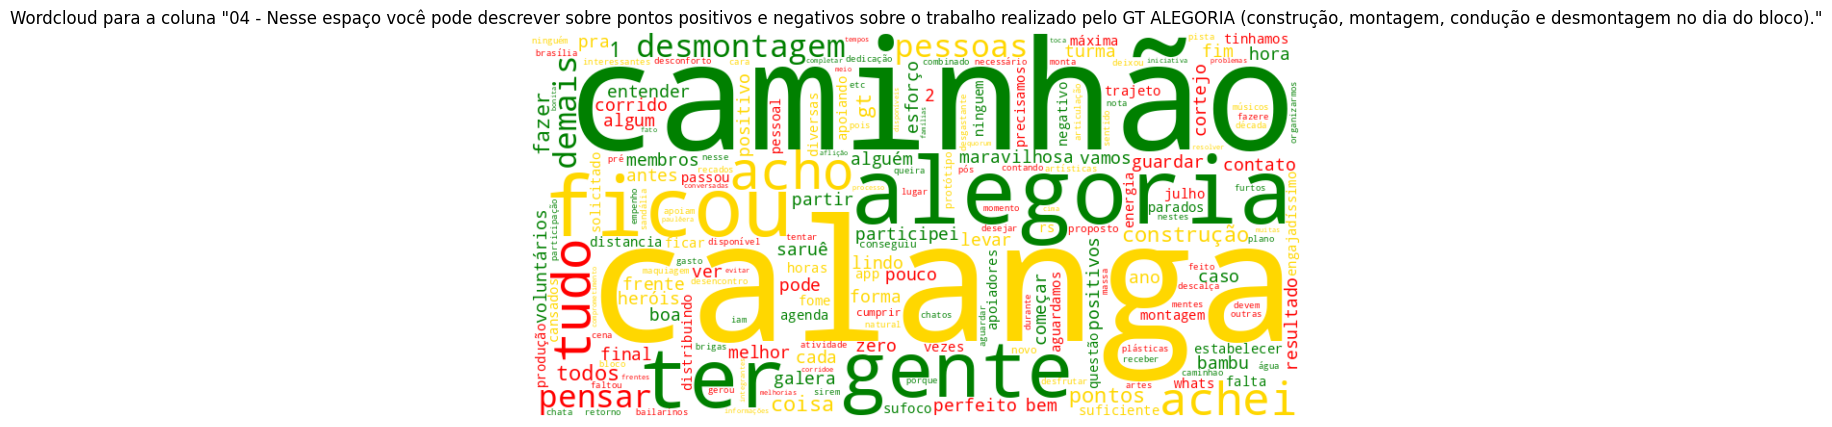

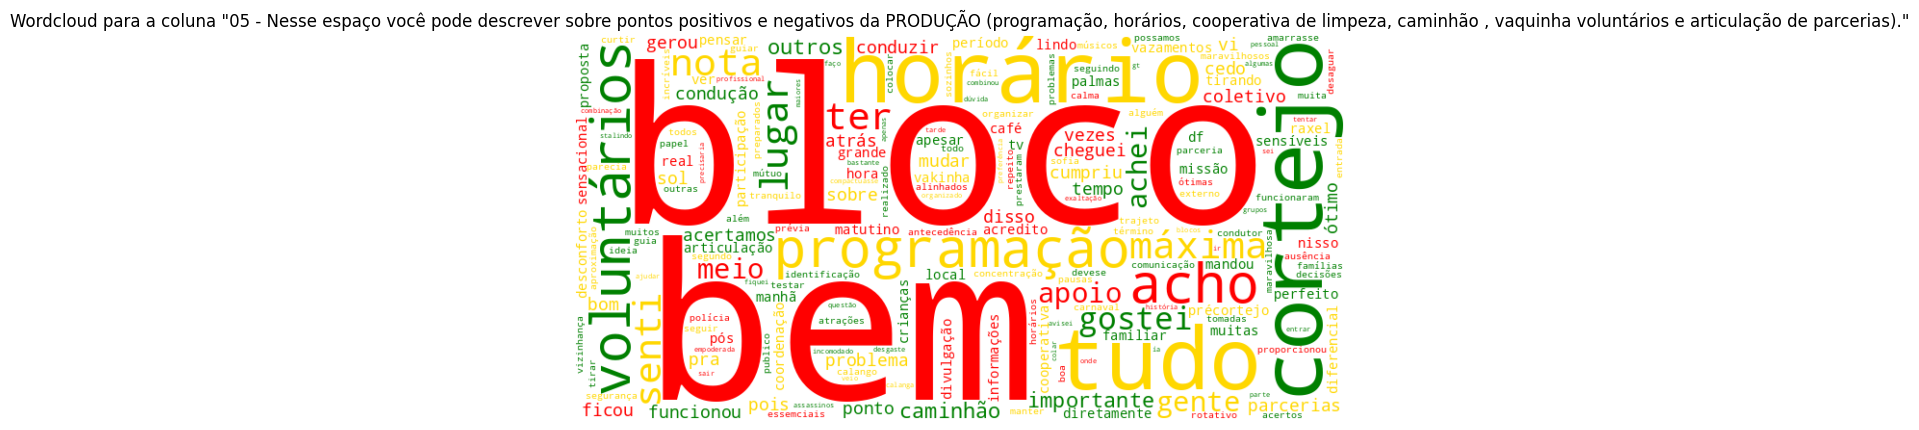

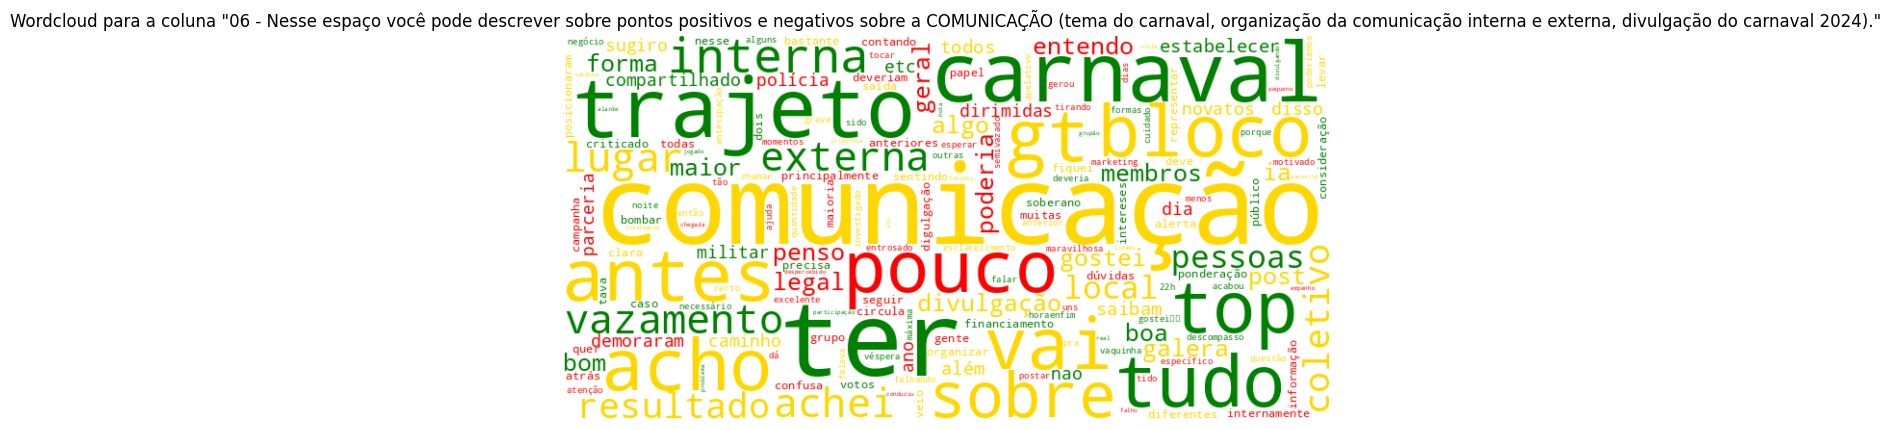

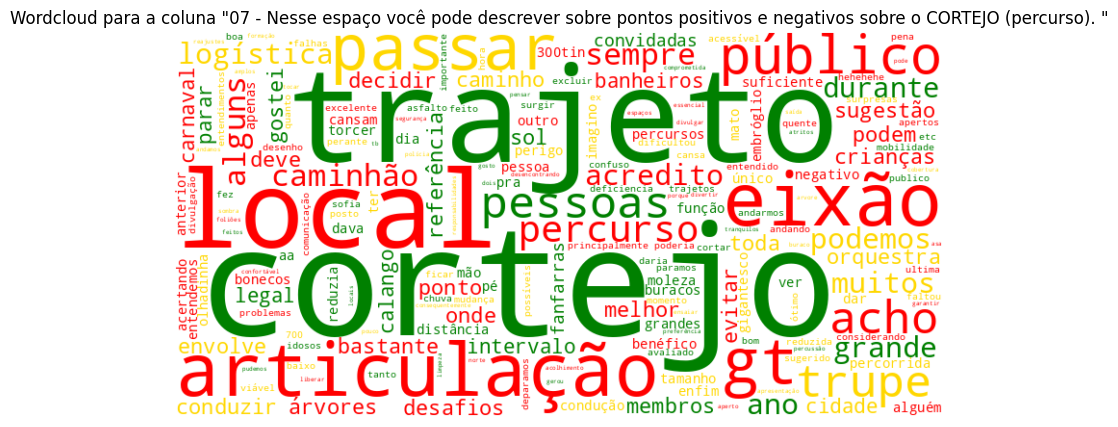

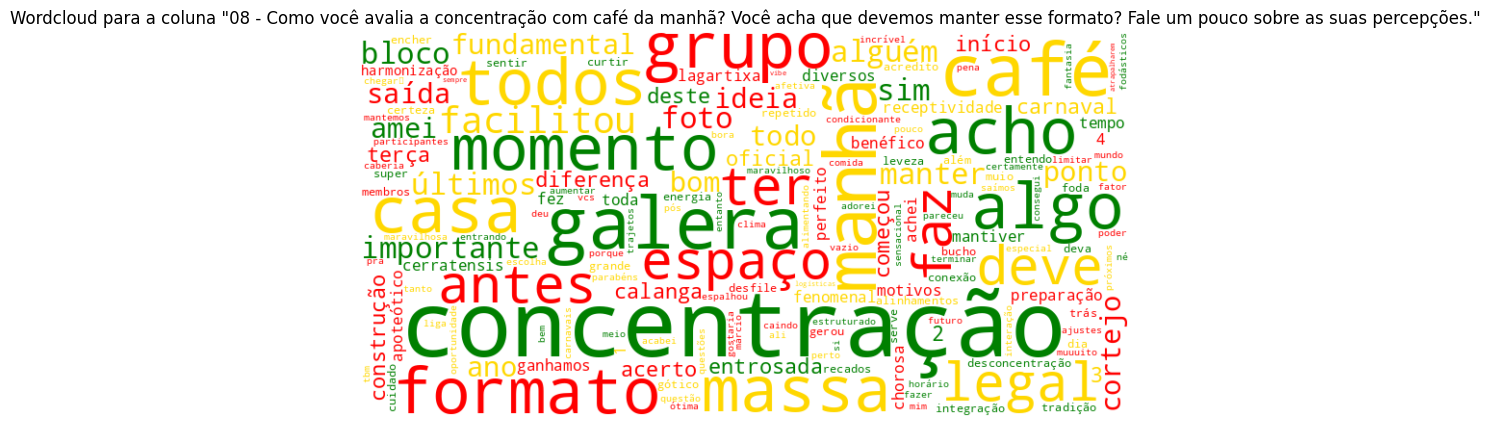

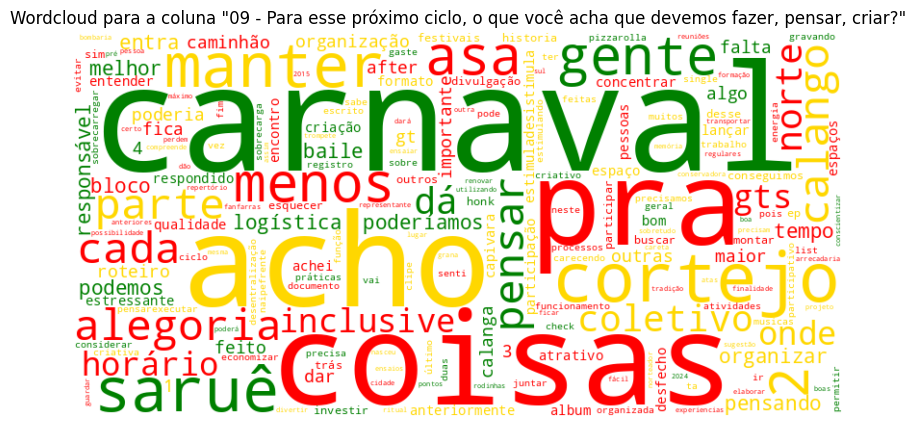

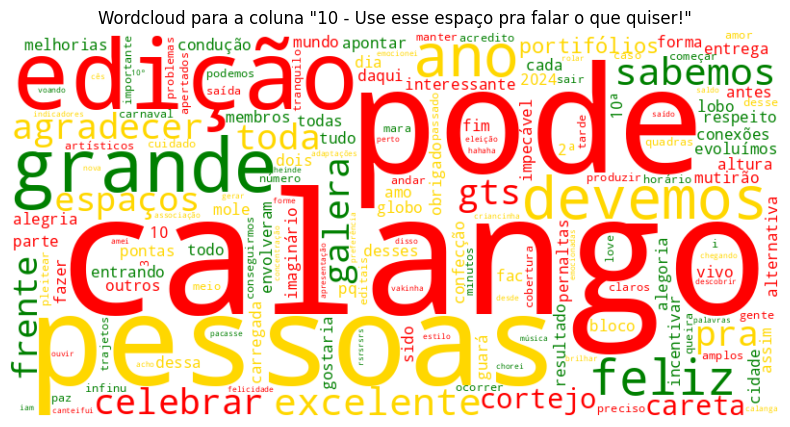

In [21]:
# Baixar stopwords em português (pode ser necessário fazer isso uma vez)
nltk.download('stopwords')
# Processamento de Texto
def preprocess_and_count_words(column):
    text = ' '.join(column.dropna())     # Concatenar todas as frases da coluna em uma única string
    text = ''.join([char for char in text if char not in string.punctuation]) #Removendo Pontuações e virgulas
    text = text.lower()
    stop_words = set(stopwords.words('portuguese')) # Usando stopwords em português
    text = ' '.join([word for word in text.split() if word not in stop_words]) #Removendo Stopwords
    words = text.split() # Dividir a string em palavras
    unique_word_counts = pd.Series(words).value_counts() #Contar cada palavra de forma única
    return unique_word_counts

# Gerar Wordcloud
def generate_wordcloud(unique_word_counts, column_name):
    colors = ['green', 'gold', 'red'] #Verde,Dourado,Vermelho
    color_func = lambda word, font_size, position, orientation, random_state=None, **kwargs: colors[np.random.randint(0, len(colors))]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unique_word_counts)
    wordcloud.recolor(color_func=color_func)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Wordcloud para a coluna "{column_name}"')
    plt.axis('off')
    plt.show()

#Formando uma Wordcloud para cada coluna do dataframe
for column in df_wc.columns:
    unique_word_counts = preprocess_and_count_words(df_wc[column])
    generate_wordcloud(unique_word_counts, column)

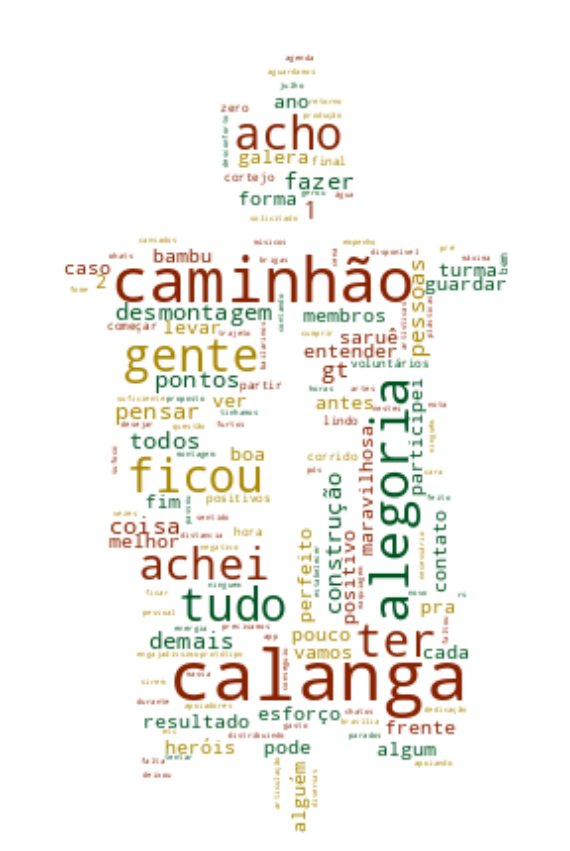

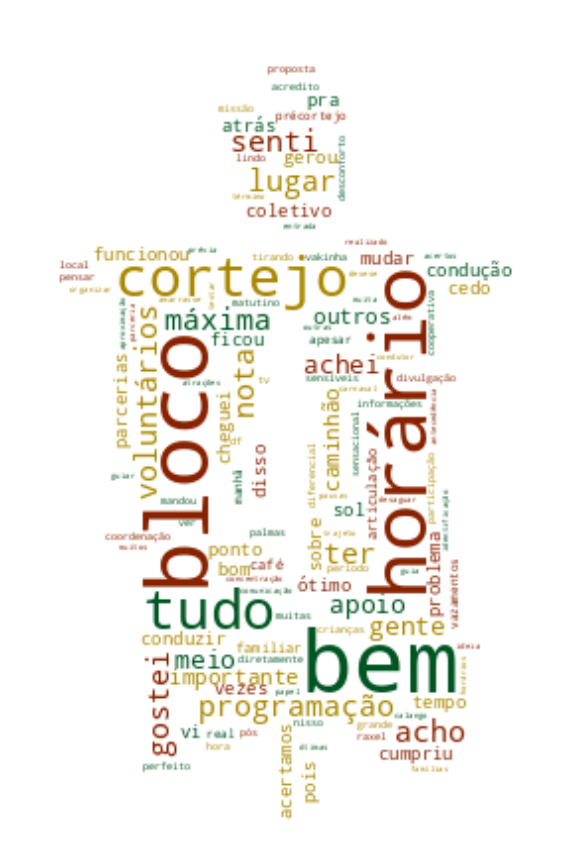

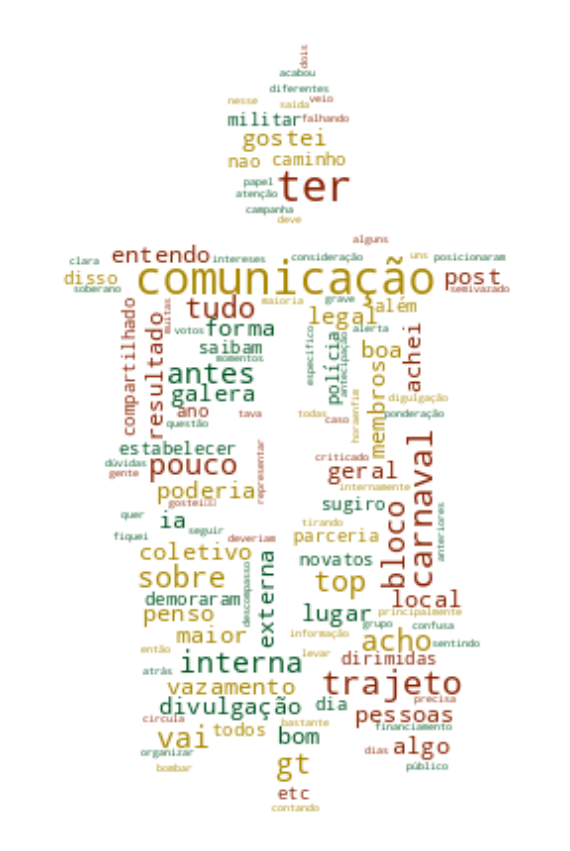

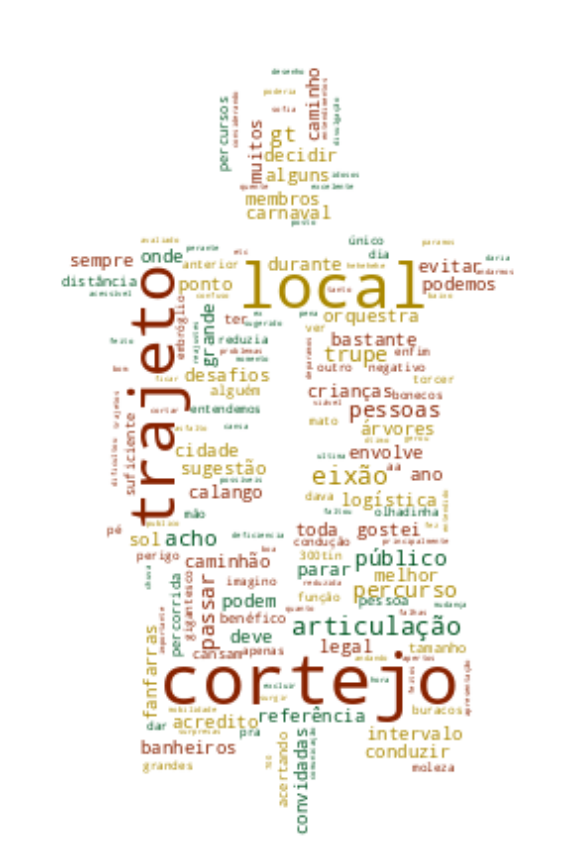

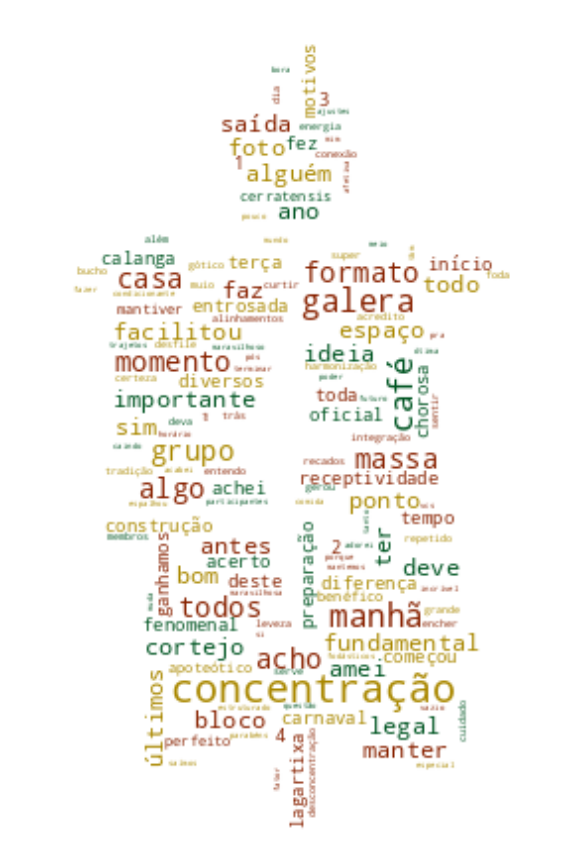

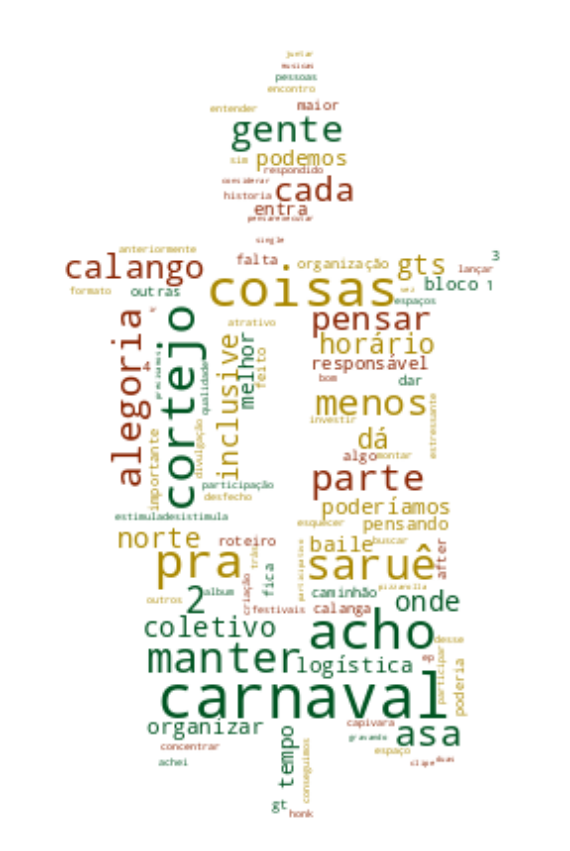

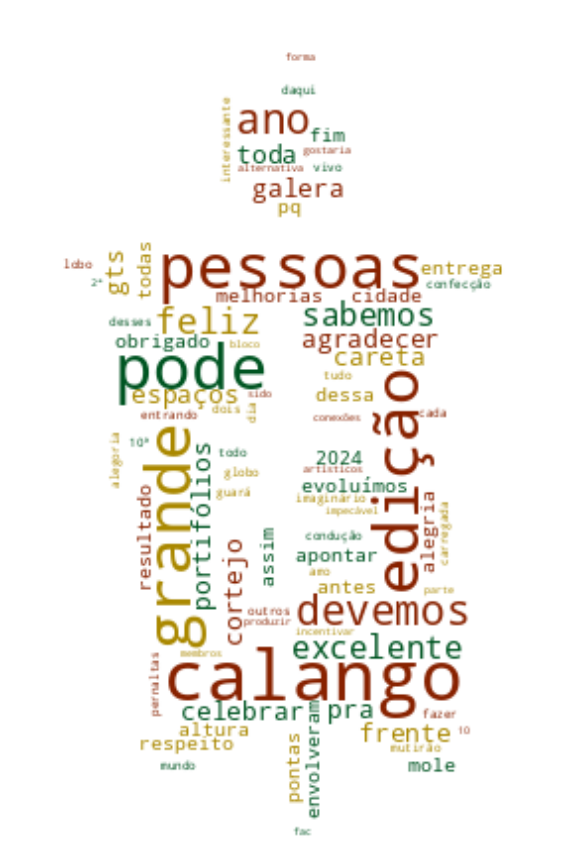

In [34]:
#Agora iremos fazer uma Wordcloud usandoa logomarca do Calango
# Processamento de Texto
def preprocess_and_count_words(column):
    text = ' '.join(column.dropna()) # Concatenar todas as frases da coluna em uma única string
    text = ''.join([char for char in text if char not in string.punctuation]) # Remover pontuações
    text = text.lower() # Converter para minúsculas
    stop_words = set(stopwords.words('portuguese')) # Usando stopwords em português
    text = ' '.join([word for word in text.split() if word not in stop_words]) # Remover stopwords em português
    words = text.split() #Quebrando a string em palavras
    unique_word_counts = pd.Series(words).value_counts() #Contando as palavras de forma única
    return unique_word_counts

# Carregando a imagem
calango_mask = np.array(Image.open('/content/Calango.jpg')) #O array interpreta os pixels da foto

#Criando uma funçao para gerar a nuvem
def generate_wordcloud(unique_word_counts, mask):
    colors = ['#AA8800', '#882200', '#005522']  # Dourado, vermelho e verde escuros
    color_func = lambda word, font_size, position, orientation, random_state=None, **kwargs: colors[np.random.randint(0, len(colors))]
    wordcloud = WordCloud(width=1920, height=1080, background_color='white', mask=mask,contour_color='firebrick').generate_from_frequencies(unique_word_counts)
    wordcloud.recolor(color_func=color_func)  # Aplicar cores personalizadas
    plt.figure(figsize=(19.20, 10.80))  # Tamanho em polegadas para corresponder à resolução HD
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#Formando uma Wordcloud para cada coluna do dataframe
for column in df_wc.columns:
    unique_word_counts = preprocess_and_count_words(df_wc[column])
    generate_wordcloud(unique_word_counts, calango_mask)